In [3]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
from scipy.special import sph_harm
#from mayavi import mlab

plt.rc('text', usetex=True)

# Laguerre-Polynome

In [4]:
def lp(n, x):
    if n == 1:
        return -x+1.0
    elif n == 0:
        return np.ones_like(x)
    else:
        return (2*(n-1)+1-x)*lp(n-1,x)/n - (n-1)*lp(n-2,x)/n

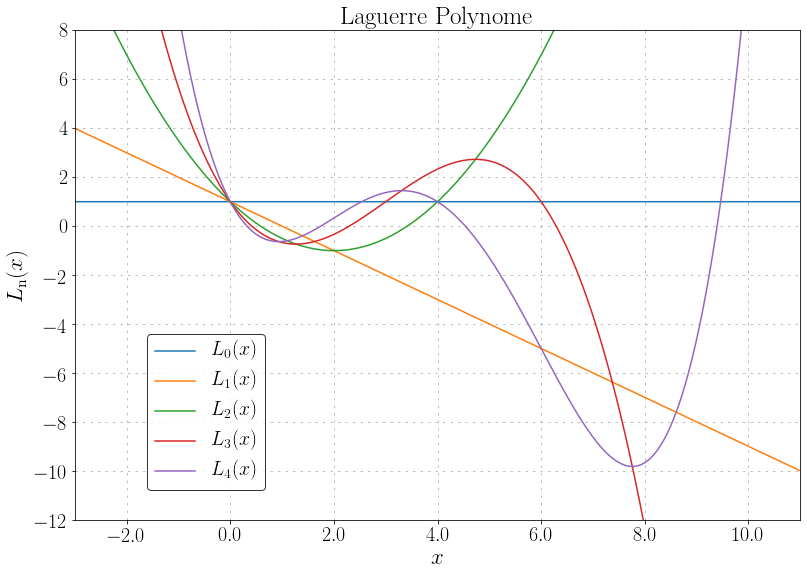

In [5]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
for n in range(5):
    x = np.linspace(-3, 11, 10000)
    y = lp(n, x)
    ax.plot(x, y, label=r'$L_{%d}(x)$'%n)


ax.grid(color='grey', linestyle=(0, (5, 10)), linewidth=0.5)

ax.set_xlim(-3, 11)
ax.set_xticks(np.linspace(-2, 10, 7, endpoint=True))
ax.set_xticklabels([r'$%.1f$'%(-2.0 + i*2.0) for i in range(7)], size=20)

ax.set_ylim(-12, 8)
ax.set_yticks(np.linspace(-12, 8, 11, endpoint=True))
ax.set_yticklabels([r'$%d$'%(-12 + i*2) for i in range(11)], size=20)



plt.legend(loc=(0.10, 0.06), fontsize=20).get_frame().set_edgecolor('k')

ax.set_title('$\mathrm{Laguerre\;Polynome}$', fontsize=25)
ax.set_xlabel('$x$', fontsize=23)
ax.set_ylabel('$L_{\mathrm{n}}(x)$', fontsize=23)

plt.show()
#fig.savefig("2-Laguerre-Polynome.pdf", bbox_inches="tight")

# Legendre-Polynome

In [8]:
def lp(n,x):
    if n == 1:
        return x
    elif n == 0:
        return np.ones_like(x)
    return (2*n-1)/n * x * lp(n-1,x)-(n-1)/n * lp(n-2,x)

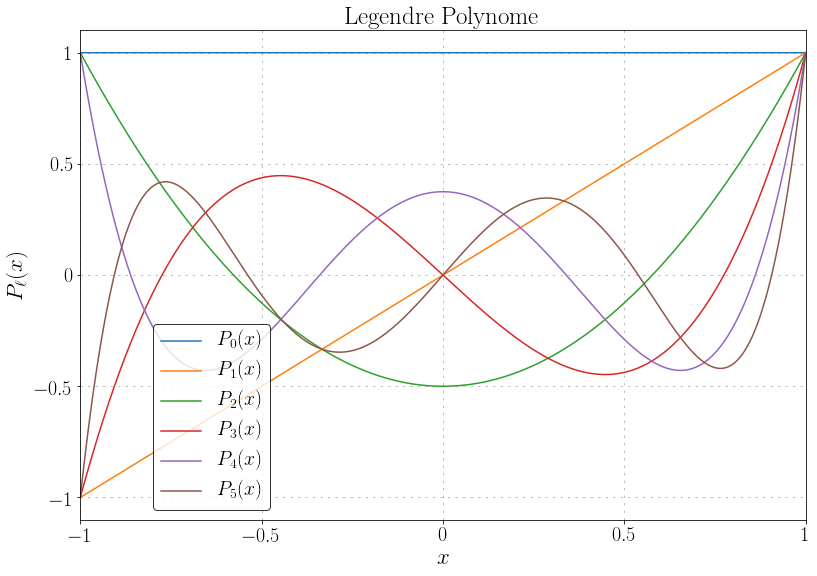

In [9]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
for n in range(6):
    x = np.linspace(-1, 1, 10000)
    y = lp(n, x)
    ax.plot(x, y, label=r'$P_{%d}(x)$'%n)


ax.grid(color='grey', linestyle=(0, (5, 10)), linewidth=0.5)
ax.set_xlim(-1, 1)
ax.set_xticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_xticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'], size=20)
ax.set_yticks(np.linspace(-1, 1, 5, endpoint=True))
ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'], size=20)


plt.legend(loc=(0.10, 0.02), fontsize=20).get_frame().set_edgecolor('k')

ax.set_title('$\mathrm{Legendre\;Polynome}$', fontsize=25)
ax.set_xlabel('$x$', fontsize=23)
ax.set_ylabel('$P_{\ell}(x)$', fontsize=23)


plt.show()
#fig.savefig("1-Legendre-Polynome.pdf", bbox_inches="tight")

# Hermite-Polynome

In [10]:
def hp(n,x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 2*x
    else:
        return 2*x*hp(n-1,x) - 2*(n-1)*hp(n-2,x)

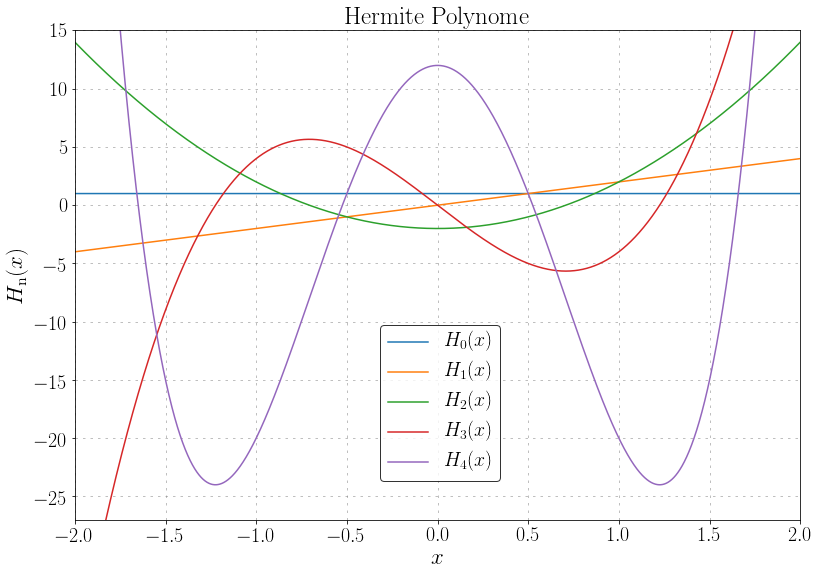

In [12]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
for n in range(5):
    x = np.linspace(-2, 2, 10000)
    y = hp(n, x)
    ax.plot(x, y, label=r'$H_{%d}(x)$'%n)


ax.grid(color='grey', linestyle=(0, (5, 10)), linewidth=0.5)

ax.set_xlim(-2, 2)
ax.set_xticks(np.linspace(-2, 2, 9, endpoint=True))
ax.set_xticklabels([r'$%.1f$'%(-2.0 + i*0.5) for i in range(9)], size=20)

ax.set_ylim(-27, 15)
ax.set_yticks(np.linspace(-25, 15, 9, endpoint=True))
ax.set_yticklabels([r'$%d$'%(-25 + i*5) for i in range(9)], size=20)



plt.legend(loc=(0.42, 0.08), fontsize=20).get_frame().set_edgecolor('k')

ax.set_title('$\mathrm{Hermite\;Polynome}$', fontsize=25)
ax.set_xlabel('$x$', fontsize=23)
ax.set_ylabel('$H_{\mathrm{n}}(x)$', fontsize=23)

plt.show()
#fig.savefig("3-Hermite-Polynome.pdf", bbox_inches="tight")

# Kugelflächenfunktionen

In [14]:
theta = np.linspace(0, np.pi, 91)
phi = np.linspace(0, 2*np.pi, 181)
theta_2d, phi_2d = np.meshgrid(theta, phi)
xyz_2d = np.array([np.sin(theta_2d) * np.cos(phi_2d),
                   np.sin(theta_2d) * np.sin(phi_2d),
                   np.cos(theta_2d)])

In [15]:
def polar_plot():
    mlab.figure(bgcolor=(1, 1, 1), size=(800,800))
    for l in range(0, 4):
        for m in range(-l,l+1):
            Y_lm = sph_harm(m, l, phi_2d, theta_2d)
            if m is not 0:
                r = abs(Y_lm.real)
            else:
                r = abs(Y_lm.real)/1.45
            cartesian = r * xyz_2d
            mlab.mesh(cartesian[0] - m, cartesian[1] + 1.3, cartesian[2] - l, scalars=Y_lm.real, colormap="cool")

    mlab.view(azimuth=90, elevation=90, distance=15)
    mlab.savefig("Kugelflaechenfunktionen.jpg", size=(300,500))
    mlab.show()

In [17]:
print(polar_plot())

None
